# BICS_ABM
Ethan Roubenoff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BICS_ABM import BICS_ABM, VaccineRule
import time
from joblib import Parallel, delayed
from scipy.stats.qmc import LatinHypercube
from scipy.stats import norm, uniform, randint

import collections
import re

/Users/eroubenoff/BICS_ABM/BICS_ABM.py:85: DtypeWarning: Columns (26,63,64,65,66,68,69,70,71,72,73,76,86,139,140,149,175,176,177,191,195,205,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,229) have mixed types. Specify dtype option on import or set low_memory=False.
  BICS = pd.read_csv("data/df_all_waves.csv")


## Quick, demonstrative example:

----------------------------------------
Parameters passed to simulation:
N_HH:            1000
GAMMA_MIN, _MAX: 48, 96
SIGMA_MIN, _MAX: 72, 168
BETA_VEC:            1  0.999926  0.999704  0.999333  0.998815  0.998149  0.997335  0.996374  0.995266  0.994011  0.99261  0.991063  0.98937  0.987532  0.98555  0.983424  0.981155  0.978743  0.976189  0.973494  0.970659  0.967684  0.964571  0.96132  0.957932  0.954409  0.950751  0.946959  0.943035  0.93898  0.934795  0.93048  0.926039  0.921471  0.916778  0.911961  0.907023  0.901964  0.896786  0.89149  0.886078  0.880552  0.874913  0.869163  0.863304  0.857337  0.851264  0.845087  0.838807  0.832428  0.825949  0.819375  0.812705  0.805943  0.79909  0.792149  0.785121  0.778009  0.770814  0.763539  0.756186  0.748757  0.741254  0.73368  0.726036  0.718326  0.71055  0.702713  0.694815  0.68686  0.678849  0.670785  0.662671  0.654508  0.6463  0.638048  0.629756  0.621425  0.613058  0.604657  0.596226  0.587766  0.57928  0.57077  0.56224  0.55369

Day   14 Hour  8 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:  1777 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day   21 Hour  6 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:  1777 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day   28 Hour  2 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day   34 Hour 22 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day   41 Hour 18 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day   48 Hour 14 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day   55 Hour 10 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day   59 Hour 23 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0
Index cases: 1740  770  206  2560  3261  


Day   65 Hour 12 | S:  3656 | E:     4 | Ic:     5 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    611

Day   69 Hour 13 | S:  3626 | E:    29 | Ic:     2 | Isc:     3 | R:     5 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    643

Day   73 Hour 12 | S:  3503 | E:   110 | Ic:    17 | Isc:    24 | R:    11 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    656

Day   77 Hour  6 | S:  3219 | E:   249 | Ic:    79 | Isc:    86 | R:    32 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day   80 Hour 10 | S:  2943 | E:   259 | Ic:   181 | Isc:   180 | R:   102 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    648

Day   83 Hour 11 | S:  2745 | E:   194 | Ic:   227 | Isc:   228 | R:   271 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    704

Day   86 Hour 10 | S:  2642 | E:   108 | Ic:   209 | Isc:   198 | R:   508 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    637

Day   89 Hour  9 | S:  2593 | E:    53 | Ic:   140 | Isc:   121 | R:   758 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    682

Day   92 Hour  9 | S:  2558 | E:    35 | Ic:    66 | Isc:    64 | R:   942 | D:     0 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    670

Day   95 Hour 10 | S:  2540 | E:    20 | Ic:    35 | Isc:    40 | R:  1029 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    664

Day   98 Hour 11 | S:  2528 | E:    12 | Ic:    25 | Isc:    24 | R:  1075 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    703

Day  101 Hour 13 | S:  2524 | E:     5 | Ic:    14 | Isc:    16 | R:  1105 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    639

Day  104 Hour 15 | S:  2520 | E:     4 | Ic:     8 | Isc:    12 | R:  1120 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    690

Day  107 Hour 17 | S:  2518 | E:     2 | Ic:     4 | Isc:     6 | R:  1134 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    637

Day  110 Hour 22 | S:  2518 | E:     0 | Ic:     3 | Isc:     5 | R:  1138 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  114 Hour  1 | S:  2517 | E:     1 | Ic:     0 | Isc:     3 | R:  1143 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  117 Hour  6 | S:  2517 | E:     0 | Ic:     1 | Isc:     3 | R:  1143 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  120 Hour  8 | S:  2514 | E:     3 | Ic:     1 | Isc:     3 | R:  1143 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    517

Day  123 Hour 11 | S:  2514 | E:     0 | Ic:     3 | Isc:     3 | R:  1144 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    631

Day  126 Hour 13 | S:  2511 | E:     3 | Ic:     2 | Isc:     3 | R:  1145 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    689

Day  129 Hour 14 | S:  2510 | E:     1 | Ic:     1 | Isc:     5 | R:  1147 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    695

Day  132 Hour 17 | S:  2510 | E:     0 | Ic:     1 | Isc:     6 | R:  1147 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    643

Day  135 Hour 20 | S:  2509 | E:     1 | Ic:     0 | Isc:     3 | R:  1151 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  139 Hour  0 | S:  2508 | E:     1 | Ic:     1 | Isc:     3 | R:  1151 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  142 Hour  5 | S:  2506 | E:     2 | Ic:     0 | Isc:     4 | R:  1152 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  145 Hour  8 | S:  2506 | E:     0 | Ic:     2 | Isc:     4 | R:  1152 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    571

Day  148 Hour 11 | S:  2505 | E:     1 | Ic:     0 | Isc:     3 | R:  1155 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    630

Day  151 Hour 13 | S:  2505 | E:     0 | Ic:     1 | Isc:     3 | R:  1155 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    699

Day  154 Hour 16 | S:  2504 | E:     1 | Ic:     1 | Isc:     3 | R:  1155 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    653

Day  157 Hour 21 | S:  2504 | E:     0 | Ic:     1 | Isc:     3 | R:  1156 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  161 Hour  2 | S:  2503 | E:     1 | Ic:     1 | Isc:     3 | R:  1156 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  164 Hour  4 | S:  2503 | E:     0 | Ic:     1 | Isc:     3 | R:  1157 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  167 Hour  8 | S:  2503 | E:     0 | Ic:     1 | Isc:     3 | R:  1157 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    566

Day  170 Hour 11 | S:  2502 | E:     1 | Ic:     0 | Isc:     3 | R:  1158 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    633

Day  173 Hour 14 | S:  2502 | E:     0 | Ic:     1 | Isc:     3 | R:  1158 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    698

Day  176 Hour 17 | S:  2501 | E:     1 | Ic:     0 | Isc:     3 | R:  1159 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    664

Day  179 Hour 23 | S:  2501 | E:     0 | Ic:     1 | Isc:     3 | R:  1159 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  183 Hour  3 | S:  2500 | E:     1 | Ic:     1 | Isc:     3 | R:  1159 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  186 Hour  6 | S:  2500 | E:     0 | Ic:     1 | Isc:     3 | R:  1160 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  189 Hour  8 | S:  2498 | E:     2 | Ic:     1 | Isc:     3 | R:  1160 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    555

Day  192 Hour 11 | S:  2498 | E:     0 | Ic:     1 | Isc:     4 | R:  1161 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    626

Day  195 Hour 15 | S:  2498 | E:     0 | Ic:     1 | Isc:     3 | R:  1162 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    665

Day  198 Hour 20 | S:  2497 | E:     1 | Ic:     0 | Isc:     3 | R:  1163 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  202 Hour  1 | S:  2497 | E:     0 | Ic:     1 | Isc:     3 | R:  1163 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  205 Hour  5 | S:  2496 | E:     1 | Ic:     0 | Isc:     3 | R:  1164 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  208 Hour  8 | S:  2496 | E:     0 | Ic:     1 | Isc:     3 | R:  1164 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    519

Day  211 Hour 10 | S:  2495 | E:     1 | Ic:     0 | Isc:     3 | R:  1165 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    680

Day  214 Hour 12 | S:  2495 | E:     0 | Ic:     1 | Isc:     3 | R:  1165 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    640

Day  217 Hour 15 | S:  2493 | E:     2 | Ic:     1 | Isc:     3 | R:  1165 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    650

Day  220 Hour 17 | S:  2493 | E:     0 | Ic:     1 | Isc:     4 | R:  1166 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    659

Day  223 Hour 23 | S:  2493 | E:     0 | Ic:     1 | Isc:     4 | R:  1166 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  227 Hour  1 | S:  2492 | E:     1 | Ic:     0 | Isc:     3 | R:  1168 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  230 Hour  6 | S:  2491 | E:     1 | Ic:     1 | Isc:     3 | R:  1168 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  233 Hour  8 | S:  2490 | E:     1 | Ic:     0 | Isc:     4 | R:  1169 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    547

Day  236 Hour 10 | S:  2489 | E:     1 | Ic:     1 | Isc:     3 | R:  1170 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    667

Day  239 Hour 12 | S:  2488 | E:     1 | Ic:     0 | Isc:     4 | R:  1171 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    653

Day  242 Hour 14 | S:  2487 | E:     1 | Ic:     1 | Isc:     3 | R:  1172 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    632

Day  245 Hour 17 | S:  2485 | E:     2 | Ic:     2 | Isc:     3 | R:  1172 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    646

Day  248 Hour 22 | S:  2485 | E:     0 | Ic:     2 | Isc:     4 | R:  1173 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  252 Hour  0 | S:  2483 | E:     2 | Ic:     2 | Isc:     3 | R:  1174 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  255 Hour  0 | S:  2483 | E:     1 | Ic:     0 | Isc:     4 | R:  1176 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  258 Hour  2 | S:  2480 | E:     3 | Ic:     1 | Isc:     4 | R:  1176 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  261 Hour  4 | S:  2477 | E:     3 | Ic:     0 | Isc:     6 | R:  1178 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  263 Hour 20 | S:  2473 | E:     5 | Ic:     2 | Isc:     5 | R:  1179 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  266 Hour 17 | S:  2470 | E:     3 | Ic:     4 | Isc:     7 | R:  1180 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    674

Day  269 Hour 13 | S:  2468 | E:     2 | Ic:     4 | Isc:     7 | R:  1183 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    643

Day  272 Hour 11 | S:  2467 | E:     1 | Ic:     4 | Isc:     4 | R:  1188 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    670

Day  275 Hour 11 | S:  2465 | E:     2 | Ic:     1 | Isc:     4 | R:  1192 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    677

Day  278 Hour 11 | S:  2459 | E:     6 | Ic:     2 | Isc:     3 | R:  1194 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    648

Day  281 Hour 10 | S:  2453 | E:     6 | Ic:     3 | Isc:     7 | R:  1195 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    647

Day  284 Hour  9 | S:  2451 | E:     3 | Ic:     5 | Isc:     7 | R:  1198 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    647

Day  287 Hour  7 | S:  2449 | E:     3 | Ic:     4 | Isc:     5 | R:  1203 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  290 Hour  8 | S:  2446 | E:     3 | Ic:     3 | Isc:     5 | R:  1207 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    577

Day  293 Hour  8 | S:  2443 | E:     3 | Ic:     3 | Isc:     4 | R:  1211 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    577

Day  296 Hour  9 | S:  2441 | E:     2 | Ic:     2 | Isc:     5 | R:  1214 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    641

Day  299 Hour 11 | S:  2439 | E:     2 | Ic:     2 | Isc:     4 | R:  1217 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    630

Day  302 Hour  3 | S:  2438 | E:     2 | Ic:     3 | Isc:     3 | R:  1218 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  305 Hour  3 | S:  2436 | E:     1 | Ic:     1 | Isc:     5 | R:  1221 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  307 Hour 23 | S:  2433 | E:     4 | Ic:     1 | Isc:     4 | R:  1222 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  310 Hour 23 | S:  2428 | E:     5 | Ic:     1 | Isc:     6 | R:  1224 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  314 Hour  0 | S:  2425 | E:     1 | Ic:     5 | Isc:     7 | R:  1226 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  317 Hour  1 | S:  2421 | E:     4 | Ic:     2 | Isc:     7 | R:  1230 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  319 Hour 23 | S:  2421 | E:     0 | Ic:     4 | Isc:     5 | R:  1234 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  323 Hour  1 | S:  2416 | E:     5 | Ic:     2 | Isc:     3 | R:  1238 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  325 Hour 23 | S:  2415 | E:     1 | Ic:     4 | Isc:     4 | R:  1240 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  329 Hour  0 | S:  2411 | E:     4 | Ic:     2 | Isc:     5 | R:  1242 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  331 Hour 13 | S:  2409 | E:     4 | Ic:     1 | Isc:     6 | R:  1244 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    675

Day  334 Hour  9 | S:  2409 | E:     1 | Ic:     3 | Isc:     4 | R:  1247 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    679

Day  337 Hour  7 | S:  2405 | E:     4 | Ic:     4 | Isc:     3 | R:  1248 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  340 Hour  6 | S:  2403 | E:     2 | Ic:     4 | Isc:     3 | R:  1252 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  343 Hour  4 | S:  2401 | E:     2 | Ic:     3 | Isc:     4 | R:  1254 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  345 Hour 16 | S:  2398 | E:     4 | Ic:     1 | Isc:     5 | R:  1256 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    671

Day  348 Hour 11 | S:  2395 | E:     3 | Ic:     4 | Isc:     3 | R:  1259 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    651

Day  351 Hour 10 | S:  2393 | E:     2 | Ic:     1 | Isc:     6 | R:  1262 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    658

Day  354 Hour 10 | S:  2392 | E:     1 | Ic:     2 | Isc:     5 | R:  1264 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    662

Day  357 Hour 10 | S:  2387 | E:     5 | Ic:     3 | Isc:     3 | R:  1266 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    692

Day  360 Hour  8 | S:  2385 | E:     3 | Ic:     2 | Isc:     5 | R:  1269 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    547

Day  363 Hour  8 | S:  2382 | E:     2 | Ic:     2 | Isc:     8 | R:  1270 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    577

Day  366 Hour  7 | S:  2379 | E:     3 | Ic:     2 | Isc:     7 | R:  1273 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  369 Hour  7 | S:  2375 | E:     3 | Ic:     4 | Isc:     5 | R:  1277 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  372 Hour  7 | S:  2370 | E:     5 | Ic:     5 | Isc:     5 | R:  1279 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  375 Hour  7 | S:  2367 | E:     3 | Ic:     6 | Isc:     5 | R:  1283 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  378 Hour  8 | S:  2361 | E:     6 | Ic:     4 | Isc:     5 | R:  1288 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    563

Day  381 Hour  8 | S:  2355 | E:     6 | Ic:     4 | Isc:     9 | R:  1290 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    524

Day  384 Hour  8 | S:  2352 | E:     3 | Ic:     7 | Isc:     7 | R:  1295 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    517

Day  387 Hour  5 | S:  2348 | E:     4 | Ic:     5 | Isc:     6 | R:  1301 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  389 Hour 23 | S:  2342 | E:     6 | Ic:     3 | Isc:     7 | R:  1306 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  392 Hour 20 | S:  2336 | E:     6 | Ic:     7 | Isc:     6 | R:  1309 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  395 Hour 20 | S:  2333 | E:     4 | Ic:     5 | Isc:     8 | R:  1314 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  398 Hour 19 | S:  2326 | E:     7 | Ic:     4 | Isc:     4 | R:  1323 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  401 Hour 16 | S:  2322 | E:     4 | Ic:     6 | Isc:     6 | R:  1326 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    663

Day  404 Hour 15 | S:  2320 | E:     2 | Ic:     3 | Isc:     9 | R:  1330 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    647

Day  407 Hour 14 | S:  2318 | E:     1 | Ic:     3 | Isc:     8 | R:  1334 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    656

Day  410 Hour 14 | S:  2315 | E:     3 | Ic:     3 | Isc:     7 | R:  1336 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    659

Day  413 Hour 11 | S:  2311 | E:     4 | Ic:     2 | Isc:     6 | R:  1341 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    677

Day  416 Hour  9 | S:  2309 | E:     2 | Ic:     2 | Isc:     8 | R:  1343 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    673

Day  419 Hour  8 | S:  2307 | E:     2 | Ic:     3 | Isc:     7 | R:  1345 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    551

Day  422 Hour  7 | S:  2303 | E:     3 | Ic:     3 | Isc:     7 | R:  1348 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  425 Hour  7 | S:  2301 | E:     3 | Ic:     1 | Isc:     6 | R:  1353 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  428 Hour  5 | S:  2299 | E:     1 | Ic:     4 | Isc:     6 | R:  1354 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  431 Hour  4 | S:  2298 | E:     1 | Ic:     3 | Isc:     4 | R:  1358 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  434 Hour  4 | S:  2296 | E:     2 | Ic:     2 | Isc:     4 | R:  1360 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  437 Hour  4 | S:  2293 | E:     3 | Ic:     2 | Isc:     5 | R:  1361 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  440 Hour  4 | S:  2292 | E:     1 | Ic:     2 | Isc:     6 | R:  1363 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  443 Hour  5 | S:  2289 | E:     3 | Ic:     3 | Isc:     5 | R:  1364 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  446 Hour  4 | S:  2287 | E:     3 | Ic:     2 | Isc:     4 | R:  1368 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  449 Hour  4 | S:  2285 | E:     2 | Ic:     2 | Isc:     6 | R:  1369 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  452 Hour  3 | S:  2289 | E:     2 | Ic:     1 | Isc:     4 | R:  1368 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  455 Hour  3 | S:  2294 | E:     2 | Ic:     3 | Isc:     4 | R:  1361 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  458 Hour  2 | S:  2307 | E:     5 | Ic:     1 | Isc:     5 | R:  1346 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  461 Hour  2 | S:  2363 | E:     6 | Ic:     3 | Isc:     7 | R:  1285 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  464 Hour  4 | S:  2512 | E:    15 | Ic:     6 | Isc:     8 | R:  1123 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  467 Hour  7 | S:  2725 | E:    37 | Ic:    10 | Isc:    13 | R:   879 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  470 Hour 12 | S:  2908 | E:    81 | Ic:    31 | Isc:    29 | R:   615 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    676

Day  473 Hour 20 | S:  2981 | E:    98 | Ic:    68 | Isc:    55 | R:   462 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  477 Hour  6 | S:  2956 | E:   110 | Ic:    71 | Isc:    93 | R:   434 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  480 Hour 10 | S:  2898 | E:    98 | Ic:    82 | Isc:   102 | R:   484 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    632

Day  483 Hour 14 | S:  2836 | E:    79 | Ic:    83 | Isc:   101 | R:   565 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    708

Day  486 Hour 20 | S:  2786 | E:    61 | Ic:    68 | Isc:    87 | R:   662 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  490 Hour  2 | S:  2771 | E:    22 | Ic:    54 | Isc:    67 | R:   750 | D:     1 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  493 Hour  7 | S:  2762 | E:    14 | Ic:    31 | Isc:    38 | R:   818 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  496 Hour 12 | S:  2753 | E:    10 | Ic:    14 | Isc:    24 | R:   862 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    674

Day  499 Hour 17 | S:  2749 | E:     6 | Ic:     7 | Isc:    14 | R:   887 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    685

Day  503 Hour  0 | S:  2747 | E:     2 | Ic:     6 | Isc:    12 | R:   896 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  505 Hour 22 | S:  2745 | E:     3 | Ic:     4 | Isc:     9 | R:   902 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  509 Hour  6 | S:  2743 | E:     2 | Ic:     4 | Isc:     8 | R:   906 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  512 Hour  7 | S:  2742 | E:     2 | Ic:     3 | Isc:    10 | R:   906 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  515 Hour  7 | S:  2743 | E:     2 | Ic:     1 | Isc:     8 | R:   909 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  518 Hour  9 | S:  2743 | E:     2 | Ic:     2 | Isc:     8 | R:   908 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    678

Day  521 Hour  7 | S:  2741 | E:     2 | Ic:     1 | Isc:     9 | R:   910 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  524 Hour  2 | S:  2742 | E:     0 | Ic:     2 | Isc:     8 | R:   911 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  527 Hour  6 | S:  2743 | E:     1 | Ic:     1 | Isc:     7 | R:   911 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  530 Hour  8 | S:  2744 | E:     0 | Ic:     1 | Isc:     7 | R:   911 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    527

Day  533 Hour 14 | S:  2741 | E:     2 | Ic:     1 | Isc:     8 | R:   911 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    611

Day  536 Hour 23 | S:  2741 | E:     1 | Ic:     1 | Isc:     8 | R:   912 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  540 Hour  8 | S:  2740 | E:     1 | Ic:     1 | Isc:     8 | R:   913 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    572

Day  543 Hour 13 | S:  2741 | E:     0 | Ic:     1 | Isc:     7 | R:   914 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    659

Day  546 Hour 19 | S:  2741 | E:     0 | Ic:     1 | Isc:     7 | R:   914 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  550 Hour  4 | S:  2740 | E:     0 | Ic:     1 | Isc:     7 | R:   915 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  553 Hour 10 | S:  2741 | E:     0 | Ic:     1 | Isc:     7 | R:   914 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    676

Day  556 Hour 16 | S:  2740 | E:     1 | Ic:     0 | Isc:     7 | R:   915 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    665

Day  560 Hour  2 | S:  2741 | E:     0 | Ic:     1 | Isc:     7 | R:   914 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  563 Hour  8 | S:  2740 | E:     1 | Ic:     0 | Isc:     7 | R:   915 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    546

Day  566 Hour 14 | S:  2741 | E:     0 | Ic:     1 | Isc:     7 | R:   914 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    649

Day  569 Hour 22 | S:  2740 | E:     1 | Ic:     0 | Isc:     7 | R:   915 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  573 Hour  7 | S:  2740 | E:     1 | Ic:     1 | Isc:     7 | R:   914 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  576 Hour 11 | S:  2739 | E:     2 | Ic:     0 | Isc:     8 | R:   914 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    710

Day  579 Hour 17 | S:  2740 | E:     0 | Ic:     1 | Isc:     9 | R:   913 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    626

Day  583 Hour  4 | S:  2738 | E:     1 | Ic:     1 | Isc:     9 | R:   914 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  586 Hour  9 | S:  2737 | E:     2 | Ic:     1 | Isc:     8 | R:   915 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    656

Day  589 Hour 14 | S:  2735 | E:     2 | Ic:     2 | Isc:     8 | R:   916 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    660

Day  592 Hour 16 | S:  2736 | E:     0 | Ic:     3 | Isc:     7 | R:   917 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    621

Day  596 Hour  0 | S:  2734 | E:     2 | Ic:     2 | Isc:     7 | R:   918 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  599 Hour  7 | S:  2732 | E:     2 | Ic:     1 | Isc:     8 | R:   920 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  602 Hour 10 | S:  2733 | E:     0 | Ic:     1 | Isc:    10 | R:   919 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    675

Day  605 Hour 12 | S:  2729 | E:     4 | Ic:     0 | Isc:     8 | R:   922 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    685

Day  608 Hour 17 | S:  2727 | E:     4 | Ic:     2 | Isc:     9 | R:   921 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    660

Day  611 Hour 22 | S:  2723 | E:     4 | Ic:     3 | Isc:    11 | R:   922 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  615 Hour  6 | S:  2720 | E:     4 | Ic:     3 | Isc:    12 | R:   924 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  618 Hour 10 | S:  2717 | E:     4 | Ic:     1 | Isc:    12 | R:   929 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    667

Day  621 Hour 15 | S:  2715 | E:     3 | Ic:     3 | Isc:    12 | R:   930 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    665

Day  624 Hour 19 | S:  2706 | E:    11 | Ic:     4 | Isc:     9 | R:   933 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  627 Hour 20 | S:  2702 | E:     7 | Ic:     4 | Isc:    13 | R:   937 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  631 Hour  0 | S:  2691 | E:    11 | Ic:     7 | Isc:    13 | R:   941 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  634 Hour  6 | S:  2692 | E:     1 | Ic:     9 | Isc:    14 | R:   947 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  637 Hour  9 | S:  2689 | E:     4 | Ic:     3 | Isc:    12 | R:   955 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    666

Day  640 Hour 13 | S:  2681 | E:     9 | Ic:     1 | Isc:    11 | R:   961 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    641

Day  643 Hour 16 | S:  2673 | E:     9 | Ic:     3 | Isc:    16 | R:   962 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    667

Day  646 Hour 22 | S:  2662 | E:    13 | Ic:     4 | Isc:    17 | R:   967 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  650 Hour  2 | S:  2659 | E:     9 | Ic:    11 | Isc:    14 | R:   970 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  653 Hour  7 | S:  2650 | E:    12 | Ic:    14 | Isc:    12 | R:   975 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  656 Hour 10 | S:  2645 | E:     8 | Ic:    13 | Isc:    13 | R:   984 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    634

Day  659 Hour 13 | S:  2639 | E:     8 | Ic:    10 | Isc:    12 | R:   994 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    693

Day  662 Hour 16 | S:  2636 | E:     8 | Ic:     9 | Isc:     9 | R:  1001 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    658

Day  665 Hour 22 | S:  2631 | E:     9 | Ic:     4 | Isc:    13 | R:  1006 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  668 Hour 21 | S:  2629 | E:     8 | Ic:     4 | Isc:    13 | R:  1009 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  671 Hour 21 | S:  2617 | E:    14 | Ic:     7 | Isc:    14 | R:  1011 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  674 Hour 11 | S:  2612 | E:    13 | Ic:     8 | Isc:    19 | R:  1011 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    680

Day  677 Hour 12 | S:  2602 | E:    14 | Ic:     7 | Isc:    19 | R:  1021 | D:     2 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    667

Day  680 Hour 14 | S:  2593 | E:    13 | Ic:    10 | Isc:    19 | R:  1027 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    658

Day  683 Hour 12 | S:  2587 | E:     9 | Ic:    13 | Isc:    14 | R:  1039 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    604

Day  686 Hour  6 | S:  2572 | E:    19 | Ic:    12 | Isc:    14 | R:  1045 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  688 Hour 17 | S:  2562 | E:    15 | Ic:    14 | Isc:    13 | R:  1058 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    666

Day  691 Hour  9 | S:  2550 | E:    15 | Ic:    14 | Isc:    22 | R:  1061 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    665

Day  694 Hour  7 | S:  2546 | E:     6 | Ic:    14 | Isc:    23 | R:  1073 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  697 Hour  7 | S:  2535 | E:    12 | Ic:    10 | Isc:    15 | R:  1090 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  700 Hour  7 | S:  2528 | E:    14 | Ic:    13 | Isc:    14 | R:  1093 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  703 Hour  7 | S:  2521 | E:     9 | Ic:    13 | Isc:    19 | R:  1100 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  706 Hour  6 | S:  2507 | E:    14 | Ic:    11 | Isc:    18 | R:  1112 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  709 Hour  3 | S:  2494 | E:    13 | Ic:     9 | Isc:    25 | R:  1121 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  712 Hour  2 | S:  2491 | E:     6 | Ic:    13 | Isc:    23 | R:  1129 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  715 Hour  1 | S:  2483 | E:    10 | Ic:     8 | Isc:    16 | R:  1145 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  717 Hour 21 | S:  2480 | E:     6 | Ic:     5 | Isc:    17 | R:  1154 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  720 Hour 13 | S:  2477 | E:     6 | Ic:     8 | Isc:    14 | R:  1157 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    648

Day  723 Hour 13 | S:  2471 | E:     8 | Ic:     6 | Isc:    15 | R:  1162 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    646

Day  726 Hour 12 | S:  2463 | E:    10 | Ic:     3 | Isc:    21 | R:  1165 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    643

Day  729 Hour 11 | S:  2458 | E:     9 | Ic:     4 | Isc:    22 | R:  1169 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    644

Day  732 Hour  8 | S:  2455 | E:     9 | Ic:     6 | Isc:    17 | R:  1175 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    543

Day  735 Hour  8 | S:  2447 | E:    12 | Ic:     6 | Isc:    15 | R:  1182 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    527

Day  738 Hour  2 | S:  2439 | E:    10 | Ic:     7 | Isc:    17 | R:  1189 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  740 Hour 22 | S:  2430 | E:    15 | Ic:     8 | Isc:    16 | R:  1193 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  743 Hour 19 | S:  2425 | E:     8 | Ic:    12 | Isc:    16 | R:  1201 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  746 Hour 19 | S:  2414 | E:    17 | Ic:     9 | Isc:    15 | R:  1207 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  749 Hour 17 | S:  2409 | E:    11 | Ic:     7 | Isc:    18 | R:  1217 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    663

Day  752 Hour 17 | S:  2401 | E:    13 | Ic:     7 | Isc:    22 | R:  1219 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    666

Day  755 Hour 16 | S:  2395 | E:    12 | Ic:     8 | Isc:    18 | R:  1229 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    662

Day  758 Hour 15 | S:  2387 | E:    15 | Ic:     5 | Isc:    20 | R:  1235 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    674

Day  761 Hour 15 | S:  2382 | E:     9 | Ic:    10 | Isc:    22 | R:  1239 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    668

Day  764 Hour 15 | S:  2378 | E:     8 | Ic:     9 | Isc:    17 | R:  1250 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    686

Day  767 Hour 14 | S:  2379 | E:     8 | Ic:     9 | Isc:    15 | R:  1251 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    669

Day  770 Hour 13 | S:  2380 | E:     4 | Ic:     5 | Isc:    16 | R:  1257 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    718

Day  773 Hour 13 | S:  2378 | E:     5 | Ic:     4 | Isc:    16 | R:  1259 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    659

Day  776 Hour 13 | S:  2377 | E:     6 | Ic:     5 | Isc:    13 | R:  1261 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    681

Day  779 Hour 13 | S:  2379 | E:     7 | Ic:     6 | Isc:    14 | R:  1256 | D:     3 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    658

Day  782 Hour 14 | S:  2374 | E:     9 | Ic:     5 | Isc:    16 | R:  1257 | D:     4 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    666

Day  785 Hour 15 | S:  2374 | E:     5 | Ic:     4 | Isc:    17 | R:  1261 | D:     4 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    690

Day  788 Hour 16 | S:  2370 | E:    10 | Ic:     4 | Isc:    14 | R:  1263 | D:     4 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    647

Day  791 Hour 17 | S:  2367 | E:     8 | Ic:     7 | Isc:    12 | R:  1267 | D:     4 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    652

Day  794 Hour 19 | S:  2367 | E:     4 | Ic:    10 | Isc:    13 | R:  1267 | D:     4 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  797 Hour 20 | S:  2366 | E:     4 | Ic:     6 | Isc:    12 | R:  1272 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  800 Hour 19 | S:  2361 | E:     7 | Ic:     3 | Isc:    14 | R:  1275 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  803 Hour 15 | S:  2364 | E:     2 | Ic:     4 | Isc:    16 | R:  1274 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    670

Day  806 Hour 16 | S:  2366 | E:     2 | Ic:     4 | Isc:    13 | R:  1275 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    639

Day  809 Hour 16 | S:  2357 | E:     8 | Ic:     4 | Isc:    12 | R:  1279 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    671

Day  812 Hour 15 | S:  2356 | E:     5 | Ic:     8 | Isc:    14 | R:  1277 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    680

Day  815 Hour 15 | S:  2356 | E:     2 | Ic:     6 | Isc:    16 | R:  1280 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    642

Day  818 Hour 14 | S:  2357 | E:     1 | Ic:     5 | Isc:    12 | R:  1285 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    700

Day  821 Hour  8 | S:  2355 | E:     4 | Ic:     1 | Isc:    12 | R:  1288 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    557

Day  824 Hour  7 | S:  2356 | E:     0 | Ic:     3 | Isc:    11 | R:  1290 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  827 Hour  8 | S:  2359 | E:     1 | Ic:     3 | Isc:    11 | R:  1286 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    615

Day  830 Hour  7 | S:  2358 | E:     2 | Ic:     2 | Isc:    10 | R:  1288 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  833 Hour  7 | S:  2360 | E:     2 | Ic:     2 | Isc:    10 | R:  1286 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  836 Hour  7 | S:  2357 | E:     3 | Ic:     4 | Isc:    10 | R:  1286 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  839 Hour  7 | S:  2357 | E:     4 | Ic:     2 | Isc:    11 | R:  1286 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  842 Hour  6 | S:  2355 | E:     3 | Ic:     4 | Isc:    12 | R:  1286 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  845 Hour  4 | S:  2355 | E:     5 | Ic:     2 | Isc:    11 | R:  1287 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  848 Hour  0 | S:  2354 | E:     4 | Ic:     3 | Isc:    13 | R:  1286 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  850 Hour 23 | S:  2357 | E:     2 | Ic:     2 | Isc:    15 | R:  1284 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  854 Hour  1 | S:  2380 | E:     3 | Ic:     3 | Isc:    10 | R:  1264 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  856 Hour 14 | S:  2407 | E:     4 | Ic:     3 | Isc:    11 | R:  1235 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    644

Day  859 Hour 11 | S:  2474 | E:    11 | Ic:     4 | Isc:    12 | R:  1159 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    649

Day  862 Hour 11 | S:  2546 | E:    19 | Ic:     8 | Isc:    15 | R:  1072 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    637

Day  865 Hour 12 | S:  2627 | E:    28 | Ic:    11 | Isc:    22 | R:   972 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    668

Day  868 Hour 15 | S:  2704 | E:    27 | Ic:    18 | Isc:    30 | R:   881 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    647

Day  871 Hour 20 | S:  2764 | E:    33 | Ic:    19 | Isc:    35 | R:   809 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  875 Hour  1 | S:  2804 | E:    26 | Ic:    22 | Isc:    29 | R:   779 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  878 Hour  7 | S:  2828 | E:    13 | Ic:    29 | Isc:    30 | R:   760 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  881 Hour 12 | S:  2843 | E:     6 | Ic:    14 | Isc:    23 | R:   774 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    602

Day  884 Hour 19 | S:  2849 | E:     3 | Ic:     7 | Isc:    15 | R:   786 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  888 Hour  5 | S:  2854 | E:     3 | Ic:     5 | Isc:    12 | R:   786 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  891 Hour 10 | S:  2853 | E:     2 | Ic:     4 | Isc:    12 | R:   789 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    677

Day  894 Hour 19 | S:  2855 | E:     0 | Ic:     3 | Isc:    11 | R:   791 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  898 Hour  7 | S:  2857 | E:     2 | Ic:     1 | Isc:    10 | R:   790 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  901 Hour 13 | S:  2857 | E:     1 | Ic:     3 | Isc:    10 | R:   789 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    640

Day  904 Hour 23 | S:  2859 | E:     0 | Ic:     1 | Isc:    11 | R:   789 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  908 Hour  6 | S:  2860 | E:     0 | Ic:     1 | Isc:    11 | R:   788 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  911 Hour 12 | S:  2861 | E:     0 | Ic:     1 | Isc:    10 | R:   788 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    661

Day  914 Hour 22 | S:  2860 | E:     1 | Ic:     0 | Isc:    10 | R:   789 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  918 Hour  6 | S:  2862 | E:     0 | Ic:     1 | Isc:    10 | R:   787 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  921 Hour 11 | S:  2862 | E:     1 | Ic:     0 | Isc:    10 | R:   787 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    633

Day  924 Hour 20 | S:  2864 | E:     0 | Ic:     1 | Isc:    10 | R:   785 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  928 Hour  7 | S:  2862 | E:     2 | Ic:     0 | Isc:    10 | R:   786 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  931 Hour 14 | S:  2862 | E:     1 | Ic:     2 | Isc:    10 | R:   785 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    649

Day  934 Hour 22 | S:  2860 | E:     1 | Ic:     1 | Isc:    12 | R:   786 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  938 Hour  7 | S:  2860 | E:     1 | Ic:     1 | Isc:    11 | R:   787 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  941 Hour 14 | S:  2857 | E:     3 | Ic:     1 | Isc:    11 | R:   788 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    685

Day  944 Hour 22 | S:  2854 | E:     5 | Ic:     2 | Isc:    10 | R:   789 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  948 Hour  7 | S:  2852 | E:     3 | Ic:     4 | Isc:    12 | R:   789 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  951 Hour 13 | S:  2850 | E:     3 | Ic:     4 | Isc:    11 | R:   792 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    660

Day  954 Hour 19 | S:  2843 | E:     7 | Ic:     3 | Isc:    11 | R:   796 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  958 Hour  3 | S:  2839 | E:     5 | Ic:     8 | Isc:    11 | R:   797 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  961 Hour  8 | S:  2832 | E:     7 | Ic:     6 | Isc:    15 | R:   800 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    542

Day  964 Hour 13 | S:  2825 | E:    11 | Ic:     4 | Isc:    13 | R:   807 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    679

Day  967 Hour 19 | S:  2816 | E:    10 | Ic:     7 | Isc:    16 | R:   811 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  971 Hour  1 | S:  2808 | E:     9 | Ic:     6 | Isc:    18 | R:   819 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  974 Hour  7 | S:  2804 | E:     7 | Ic:     8 | Isc:    15 | R:   826 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  977 Hour 11 | S:  2788 | E:    14 | Ic:     3 | Isc:    18 | R:   837 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    732

Day  980 Hour 15 | S:  2776 | E:    12 | Ic:     9 | Isc:    23 | R:   840 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    646

Day  983 Hour 21 | S:  2764 | E:    12 | Ic:    10 | Isc:    24 | R:   850 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day  987 Hour  3 | S:  2754 | E:    12 | Ic:    12 | Isc:    21 | R:   861 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  990 Hour  7 | S:  2741 | E:    13 | Ic:     8 | Isc:    22 | R:   876 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day  993 Hour 11 | S:  2727 | E:    14 | Ic:    12 | Isc:    24 | R:   883 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    671

Day  996 Hour 14 | S:  2710 | E:    23 | Ic:    14 | Isc:    19 | R:   894 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    676

Day  999 Hour 17 | S:  2700 | E:    18 | Ic:    15 | Isc:    23 | R:   904 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    663

Day 1002 Hour 23 | S:  2680 | E:    22 | Ic:    18 | Isc:    21 | R:   919 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1006 Hour  3 | S:  2661 | E:    23 | Ic:    16 | Isc:    26 | R:   934 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1009 Hour  6 | S:  2647 | E:    19 | Ic:    26 | Isc:    24 | R:   944 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1012 Hour  7 | S:  2632 | E:    17 | Ic:    21 | Isc:    26 | R:   964 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1015 Hour  9 | S:  2629 | E:    15 | Ic:    18 | Isc:    22 | R:   976 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    664

Day 1018 Hour  7 | S:  2622 | E:    12 | Ic:    13 | Isc:    25 | R:   988 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1021 Hour  7 | S:  2612 | E:    16 | Ic:    10 | Isc:    21 | R:  1001 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1024 Hour  7 | S:  2596 | E:    17 | Ic:    14 | Isc:    24 | R:  1009 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1027 Hour  7 | S:  2582 | E:    20 | Ic:    13 | Isc:    22 | R:  1023 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1030 Hour  6 | S:  2564 | E:    24 | Ic:    20 | Isc:    24 | R:  1028 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1033 Hour  6 | S:  2555 | E:    15 | Ic:    19 | Isc:    33 | R:  1038 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1036 Hour  7 | S:  2550 | E:    13 | Ic:    22 | Isc:    24 | R:  1051 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1039 Hour  7 | S:  2544 | E:    15 | Ic:    14 | Isc:    24 | R:  1063 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1042 Hour  8 | S:  2542 | E:    15 | Ic:    11 | Isc:    25 | R:  1067 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    548

Day 1045 Hour  8 | S:  2535 | E:    13 | Ic:    14 | Isc:    23 | R:  1075 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    592

Day 1048 Hour  8 | S:  2521 | E:    21 | Ic:    17 | Isc:    17 | R:  1084 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    559

Day 1051 Hour  8 | S:  2514 | E:    14 | Ic:    19 | Isc:    20 | R:  1093 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    543

Day 1054 Hour  8 | S:  2507 | E:    12 | Ic:    17 | Isc:    23 | R:  1101 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    525

Day 1057 Hour  8 | S:  2514 | E:     6 | Ic:    12 | Isc:    22 | R:  1106 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    569

Day 1060 Hour  8 | S:  2509 | E:    14 | Ic:     9 | Isc:    16 | R:  1112 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    567

Day 1063 Hour  8 | S:  2511 | E:     8 | Ic:    10 | Isc:    20 | R:  1111 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    574

Day 1066 Hour  9 | S:  2506 | E:    17 | Ic:    10 | Isc:    20 | R:  1107 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    663

Day 1069 Hour  8 | S:  2508 | E:    14 | Ic:    13 | Isc:    23 | R:  1102 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    558

Day 1072 Hour  8 | S:  2497 | E:    16 | Ic:    13 | Isc:    25 | R:  1109 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    563

Day 1075 Hour  5 | S:  2491 | E:    23 | Ic:    12 | Isc:    23 | R:  1111 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1078 Hour  4 | S:  2478 | E:    30 | Ic:    14 | Isc:    31 | R:  1107 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1081 Hour  3 | S:  2470 | E:    18 | Ic:    19 | Isc:    38 | R:  1115 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1084 Hour  1 | S:  2453 | E:    26 | Ic:    18 | Isc:    38 | R:  1125 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1087 Hour  0 | S:  2451 | E:    18 | Ic:    16 | Isc:    35 | R:  1140 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1089 Hour 23 | S:  2446 | E:    15 | Ic:    14 | Isc:    33 | R:  1152 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1092 Hour 21 | S:  2448 | E:     9 | Ic:    16 | Isc:    28 | R:  1159 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1095 Hour 20 | S:  2445 | E:    21 | Ic:    11 | Isc:    22 | R:  1161 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1098 Hour 19 | S:  2443 | E:    17 | Ic:    16 | Isc:    21 | R:  1163 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1101 Hour 17 | S:  2440 | E:    12 | Ic:    13 | Isc:    25 | R:  1170 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    634

Day 1104 Hour 17 | S:  2439 | E:    13 | Ic:     8 | Isc:    25 | R:  1175 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    690

Day 1107 Hour 16 | S:  2436 | E:     7 | Ic:     9 | Isc:    23 | R:  1185 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    697

Day 1110 Hour 15 | S:  2433 | E:    12 | Ic:     7 | Isc:    14 | R:  1194 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    656

Day 1113 Hour 14 | S:  2431 | E:    12 | Ic:     9 | Isc:    18 | R:  1190 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    690

Day 1116 Hour 13 | S:  2417 | E:    25 | Ic:    11 | Isc:    18 | R:  1189 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    675

Day 1119 Hour 12 | S:  2412 | E:    17 | Ic:    19 | Isc:    20 | R:  1192 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    676

Day 1122 Hour 11 | S:  2399 | E:    20 | Ic:    20 | Isc:    22 | R:  1199 | D:     5 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    607

Day 1125 Hour 10 | S:  2395 | E:    17 | Ic:    13 | Isc:    29 | R:  1205 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    643

Day 1128 Hour  9 | S:  2390 | E:    12 | Ic:    10 | Isc:    29 | R:  1218 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    652

Day 1131 Hour  8 | S:  2395 | E:     7 | Ic:     8 | Isc:    27 | R:  1222 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    577

Day 1134 Hour  7 | S:  2389 | E:    10 | Ic:     9 | Isc:    18 | R:  1233 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1137 Hour  7 | S:  2391 | E:    12 | Ic:    10 | Isc:    17 | R:  1229 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1140 Hour  7 | S:  2397 | E:     5 | Ic:     8 | Isc:    20 | R:  1229 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1143 Hour  7 | S:  2399 | E:     8 | Ic:     4 | Isc:    20 | R:  1228 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1146 Hour  7 | S:  2402 | E:     9 | Ic:     5 | Isc:    19 | R:  1224 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1149 Hour  7 | S:  2398 | E:    11 | Ic:     5 | Isc:    21 | R:  1224 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1152 Hour  7 | S:  2400 | E:    11 | Ic:     7 | Isc:    20 | R:  1221 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1155 Hour  7 | S:  2392 | E:    12 | Ic:    12 | Isc:    17 | R:  1226 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1158 Hour  7 | S:  2385 | E:    16 | Ic:    11 | Isc:    16 | R:  1231 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1161 Hour  0 | S:  2375 | E:    14 | Ic:    18 | Isc:    17 | R:  1235 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1163 Hour 21 | S:  2377 | E:     6 | Ic:    11 | Isc:    24 | R:  1241 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1166 Hour 19 | S:  2374 | E:    11 | Ic:     2 | Isc:    21 | R:  1251 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1169 Hour 15 | S:  2376 | E:     7 | Ic:     7 | Isc:    15 | R:  1254 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    661

Day 1172 Hour 14 | S:  2376 | E:     6 | Ic:     7 | Isc:    16 | R:  1254 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    672

Day 1175 Hour 13 | S:  2374 | E:     6 | Ic:     6 | Isc:    16 | R:  1257 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    655

Day 1178 Hour  4 | S:  2373 | E:     7 | Ic:     8 | Isc:    18 | R:  1253 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1180 Hour 23 | S:  2375 | E:     5 | Ic:     4 | Isc:    19 | R:  1256 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1183 Hour 21 | S:  2372 | E:     8 | Ic:     6 | Isc:    16 | R:  1257 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1186 Hour 19 | S:  2365 | E:     7 | Ic:     9 | Isc:    15 | R:  1263 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1189 Hour 17 | S:  2372 | E:     3 | Ic:     8 | Isc:    17 | R:  1259 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    683

Day 1192 Hour 16 | S:  2370 | E:     5 | Ic:     2 | Isc:    17 | R:  1265 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    670

Day 1195 Hour 15 | S:  2372 | E:     1 | Ic:     3 | Isc:    16 | R:  1267 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    663

Day 1198 Hour 14 | S:  2374 | E:     3 | Ic:     3 | Isc:    14 | R:  1265 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    671

Day 1201 Hour  7 | S:  2376 | E:     4 | Ic:     4 | Isc:    12 | R:  1263 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1204 Hour  7 | S:  2380 | E:     1 | Ic:     5 | Isc:    13 | R:  1260 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1207 Hour  7 | S:  2378 | E:     2 | Ic:     3 | Isc:    14 | R:  1262 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1210 Hour  7 | S:  2378 | E:     2 | Ic:     1 | Isc:    14 | R:  1264 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1213 Hour  7 | S:  2378 | E:     2 | Ic:     2 | Isc:    14 | R:  1263 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1216 Hour  7 | S:  2374 | E:     5 | Ic:     3 | Isc:    13 | R:  1264 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1219 Hour  7 | S:  2374 | E:     3 | Ic:     2 | Isc:    14 | R:  1266 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1222 Hour  7 | S:  2373 | E:     3 | Ic:     3 | Isc:    16 | R:  1264 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1225 Hour  7 | S:  2378 | E:     0 | Ic:     2 | Isc:    14 | R:  1265 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1228 Hour  0 | S:  2379 | E:     1 | Ic:     1 | Isc:    13 | R:  1265 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1230 Hour 20 | S:  2378 | E:     3 | Ic:     0 | Isc:    12 | R:  1266 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1233 Hour 19 | S:  2379 | E:     3 | Ic:     3 | Isc:    12 | R:  1262 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1236 Hour 16 | S:  2381 | E:     3 | Ic:     3 | Isc:    13 | R:  1259 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    706

Day 1239 Hour 16 | S:  2382 | E:     1 | Ic:     3 | Isc:    14 | R:  1259 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    666

Day 1242 Hour 14 | S:  2381 | E:     1 | Ic:     2 | Isc:    13 | R:  1262 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    639

Day 1245 Hour 14 | S:  2386 | E:     1 | Ic:     1 | Isc:    13 | R:  1258 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    660

Day 1248 Hour 13 | S:  2393 | E:     1 | Ic:     1 | Isc:    13 | R:  1251 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    670

Day 1251 Hour 13 | S:  2409 | E:     1 | Ic:     1 | Isc:    12 | R:  1236 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    636

Day 1254 Hour 10 | S:  2430 | E:     3 | Ic:     1 | Isc:    12 | R:  1213 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    689

Day 1257 Hour 11 | S:  2459 | E:     2 | Ic:     2 | Isc:    13 | R:  1183 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    685

Day 1260 Hour 12 | S:  2478 | E:     0 | Ic:     3 | Isc:    13 | R:  1165 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    632

Day 1263 Hour 13 | S:  2500 | E:     2 | Ic:     1 | Isc:    13 | R:  1143 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    654

Day 1266 Hour 12 | S:  2521 | E:     0 | Ic:     1 | Isc:    13 | R:  1124 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    645

Day 1269 Hour 10 | S:  2528 | E:     0 | Ic:     1 | Isc:    12 | R:  1118 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    691

Day 1272 Hour 11 | S:  2530 | E:     1 | Ic:     0 | Isc:    12 | R:  1116 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    634

Day 1275 Hour 14 | S:  2533 | E:     0 | Ic:     1 | Isc:    12 | R:  1113 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    657

Day 1278 Hour 12 | S:  2534 | E:     1 | Ic:     0 | Isc:    12 | R:  1112 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    629

Day 1281 Hour 14 | S:  2537 | E:     0 | Ic:     1 | Isc:    12 | R:  1109 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    615

Day 1284 Hour 16 | S:  2535 | E:     2 | Ic:     1 | Isc:    12 | R:  1109 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    702

Day 1287 Hour 19 | S:  2538 | E:     0 | Ic:     1 | Isc:    13 | R:  1107 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1290 Hour 23 | S:  2539 | E:     0 | Ic:     1 | Isc:    12 | R:  1107 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1294 Hour  2 | S:  2538 | E:     1 | Ic:     0 | Isc:    12 | R:  1108 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1297 Hour  2 | S:  2539 | E:     0 | Ic:     1 | Isc:    12 | R:  1107 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1300 Hour  3 | S:  2538 | E:     1 | Ic:     0 | Isc:    12 | R:  1108 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1303 Hour  6 | S:  2538 | E:     1 | Ic:     1 | Isc:    12 | R:  1107 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1306 Hour  7 | S:  2534 | E:     4 | Ic:     2 | Isc:    12 | R:  1107 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1309 Hour  8 | S:  2533 | E:     0 | Ic:     5 | Isc:    14 | R:  1107 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    588

Day 1312 Hour  4 | S:  2528 | E:     5 | Ic:     4 | Isc:    14 | R:  1108 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1314 Hour 11 | S:  2528 | E:     1 | Ic:     4 | Isc:    13 | R:  1113 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    728

Day 1317 Hour 10 | S:  2524 | E:     4 | Ic:     4 | Isc:    14 | R:  1113 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    629

Day 1320 Hour  7 | S:  2513 | E:    12 | Ic:     3 | Isc:    16 | R:  1115 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1323 Hour  7 | S:  2501 | E:    14 | Ic:     7 | Isc:    21 | R:  1116 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1326 Hour  7 | S:  2487 | E:    16 | Ic:     9 | Isc:    25 | R:  1122 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1329 Hour  7 | S:  2468 | E:    20 | Ic:    13 | Isc:    28 | R:  1130 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1332 Hour  7 | S:  2461 | E:    10 | Ic:    13 | Isc:    31 | R:  1144 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1335 Hour  7 | S:  2449 | E:    14 | Ic:     9 | Isc:    27 | R:  1160 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1338 Hour  7 | S:  2438 | E:    13 | Ic:    12 | Isc:    24 | R:  1172 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1341 Hour  7 | S:  2435 | E:     5 | Ic:    13 | Isc:    24 | R:  1182 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1344 Hour  7 | S:  2430 | E:    12 | Ic:     5 | Isc:    20 | R:  1192 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1347 Hour  7 | S:  2423 | E:    15 | Ic:    10 | Isc:    18 | R:  1193 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1350 Hour  4 | S:  2418 | E:    12 | Ic:     9 | Isc:    24 | R:  1196 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1352 Hour 23 | S:  2414 | E:    16 | Ic:     9 | Isc:    21 | R:  1199 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1355 Hour 19 | S:  2409 | E:    14 | Ic:    11 | Isc:    24 | R:  1201 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1358 Hour 16 | S:  2410 | E:    12 | Ic:    11 | Isc:    22 | R:  1204 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    684

Day 1361 Hour 15 | S:  2406 | E:    10 | Ic:    13 | Isc:    22 | R:  1208 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    711

Day 1364 Hour 13 | S:  2405 | E:    12 | Ic:    11 | Isc:    18 | R:  1213 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    623

Day 1367 Hour 11 | S:  2411 | E:     9 | Ic:     8 | Isc:    20 | R:  1211 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    670

Day 1370 Hour 10 | S:  2416 | E:     7 | Ic:     8 | Isc:    20 | R:  1208 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    647

Day 1373 Hour  9 | S:  2416 | E:    10 | Ic:     5 | Isc:    21 | R:  1207 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    666

Day 1376 Hour  9 | S:  2414 | E:    12 | Ic:     7 | Isc:    24 | R:  1202 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    672

Day 1379 Hour  9 | S:  2418 | E:    10 | Ic:    12 | Isc:    19 | R:  1200 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    670

Day 1382 Hour  8 | S:  2422 | E:    10 | Ic:    12 | Isc:    20 | R:  1195 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    583

Day 1385 Hour  7 | S:  2426 | E:    13 | Ic:    12 | Isc:    16 | R:  1192 | D:     6 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1388 Hour  7 | S:  2426 | E:    17 | Ic:    12 | Isc:    22 | R:  1181 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1391 Hour  5 | S:  2418 | E:    22 | Ic:     9 | Isc:    33 | R:  1176 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1393 Hour 12 | S:  2423 | E:    24 | Ic:    13 | Isc:    33 | R:  1165 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    717

Day 1396 Hour  7 | S:  2421 | E:    24 | Ic:    19 | Isc:    36 | R:  1158 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1399 Hour  2 | S:  2408 | E:    28 | Ic:    20 | Isc:    35 | R:  1167 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1401 Hour 13 | S:  2407 | E:    26 | Ic:    24 | Isc:    38 | R:  1163 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    678

Day 1403 Hour 23 | S:  2394 | E:    26 | Ic:    23 | Isc:    33 | R:  1182 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1406 Hour 17 | S:  2394 | E:    19 | Ic:    26 | Isc:    28 | R:  1191 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    643

Day 1409 Hour 13 | S:  2389 | E:    24 | Ic:    16 | Isc:    28 | R:  1201 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    663

Day 1412 Hour  9 | S:  2381 | E:    28 | Ic:    15 | Isc:    28 | R:  1206 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    660

Day 1415 Hour  7 | S:  2380 | E:    18 | Ic:    21 | Isc:    34 | R:  1205 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1418 Hour  4 | S:  2377 | E:    24 | Ic:    21 | Isc:    33 | R:  1203 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1420 Hour 22 | S:  2382 | E:    19 | Ic:    18 | Isc:    34 | R:  1205 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1423 Hour 16 | S:  2381 | E:    22 | Ic:    13 | Isc:    32 | R:  1210 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    660

Day 1426 Hour 13 | S:  2373 | E:    25 | Ic:    14 | Isc:    29 | R:  1217 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    672

Day 1429 Hour  9 | S:  2358 | E:    27 | Ic:    22 | Isc:    31 | R:  1220 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    628

Day 1432 Hour  6 | S:  2352 | E:    24 | Ic:    23 | Isc:    38 | R:  1221 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1434 Hour 14 | S:  2341 | E:    25 | Ic:    19 | Isc:    44 | R:  1229 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    642

Day 1437 Hour 10 | S:  2341 | E:    17 | Ic:    20 | Isc:    36 | R:  1244 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    652

Day 1440 Hour  7 | S:  2334 | E:    21 | Ic:    14 | Isc:    36 | R:  1253 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1443 Hour  2 | S:  2332 | E:    16 | Ic:    12 | Isc:    33 | R:  1265 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1445 Hour 19 | S:  2316 | E:    18 | Ic:    17 | Isc:    33 | R:  1274 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1448 Hour 13 | S:  2320 | E:    12 | Ic:    15 | Isc:    26 | R:  1285 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    650

Day 1451 Hour  2 | S:  2327 | E:     9 | Ic:    10 | Isc:    27 | R:  1285 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1453 Hour 19 | S:  2321 | E:    17 | Ic:     7 | Isc:    25 | R:  1288 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1456 Hour 13 | S:  2326 | E:    12 | Ic:     8 | Isc:    27 | R:  1285 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    674

Day 1459 Hour 10 | S:  2331 | E:     8 | Ic:    10 | Isc:    27 | R:  1282 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    645

Day 1462 Hour  8 | S:  2341 | E:    12 | Ic:     6 | Isc:    24 | R:  1275 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    560

Day 1465 Hour  0 | S:  2345 | E:    14 | Ic:     5 | Isc:    26 | R:  1268 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1467 Hour 21 | S:  2366 | E:     8 | Ic:    14 | Isc:    22 | R:  1248 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1470 Hour 19 | S:  2367 | E:    22 | Ic:    12 | Isc:    18 | R:  1239 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1473 Hour 16 | S:  2378 | E:     9 | Ic:    16 | Isc:    26 | R:  1229 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    701

Day 1476 Hour 15 | S:  2382 | E:    18 | Ic:    17 | Isc:    24 | R:  1217 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    658

Day 1479 Hour 14 | S:  2384 | E:    14 | Ic:    13 | Isc:    24 | R:  1223 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    652

Day 1482 Hour 13 | S:  2371 | E:    31 | Ic:    12 | Isc:    24 | R:  1220 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    662

Day 1485 Hour  9 | S:  2369 | E:    19 | Ic:    23 | Isc:    28 | R:  1219 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    630

Day 1488 Hour  8 | S:  2365 | E:    17 | Ic:    23 | Isc:    28 | R:  1225 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    537

Day 1491 Hour  7 | S:  2369 | E:    10 | Ic:    21 | Isc:    25 | R:  1233 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1494 Hour  7 | S:  2365 | E:    11 | Ic:    15 | Isc:    23 | R:  1244 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1497 Hour  7 | S:  2362 | E:    10 | Ic:     6 | Isc:    28 | R:  1252 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1500 Hour  7 | S:  2357 | E:    15 | Ic:     8 | Isc:    26 | R:  1252 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1503 Hour  7 | S:  2361 | E:    11 | Ic:    14 | Isc:    24 | R:  1248 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1506 Hour  7 | S:  2363 | E:    12 | Ic:    17 | Isc:    24 | R:  1242 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1509 Hour  6 | S:  2370 | E:    10 | Ic:    17 | Isc:    26 | R:  1235 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1512 Hour  4 | S:  2373 | E:    13 | Ic:    16 | Isc:    26 | R:  1230 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1515 Hour  1 | S:  2378 | E:    11 | Ic:     8 | Isc:    25 | R:  1236 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1517 Hour 23 | S:  2385 | E:     4 | Ic:    11 | Isc:    24 | R:  1234 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1520 Hour 22 | S:  2389 | E:     8 | Ic:     8 | Isc:    19 | R:  1234 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1523 Hour 20 | S:  2394 | E:     5 | Ic:     8 | Isc:    15 | R:  1236 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1526 Hour 19 | S:  2394 | E:     8 | Ic:     6 | Isc:    17 | R:  1233 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1529 Hour 17 | S:  2389 | E:    13 | Ic:     6 | Isc:    18 | R:  1232 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    625

Day 1532 Hour 16 | S:  2390 | E:    11 | Ic:     9 | Isc:    19 | R:  1229 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    667

Day 1535 Hour 14 | S:  2388 | E:    13 | Ic:    12 | Isc:    19 | R:  1226 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    644

Day 1538 Hour 13 | S:  2391 | E:     8 | Ic:     6 | Isc:    25 | R:  1228 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    640

Day 1541 Hour 12 | S:  2395 | E:     7 | Ic:     9 | Isc:    23 | R:  1224 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    626

Day 1544 Hour 11 | S:  2397 | E:     9 | Ic:     8 | Isc:    21 | R:  1223 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    672

Day 1547 Hour 11 | S:  2411 | E:     3 | Ic:     5 | Isc:    23 | R:  1216 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    674

Day 1550 Hour 10 | S:  2415 | E:     6 | Ic:     3 | Isc:    19 | R:  1215 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    692

Day 1553 Hour 10 | S:  2416 | E:     7 | Ic:     3 | Isc:    17 | R:  1215 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    656

Day 1556 Hour 10 | S:  2420 | E:     3 | Ic:     6 | Isc:    18 | R:  1211 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    684

Day 1559 Hour  9 | S:  2414 | E:     8 | Ic:     6 | Isc:    18 | R:  1212 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    669

Day 1562 Hour  9 | S:  2419 | E:     3 | Ic:     7 | Isc:    21 | R:  1208 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    681

Day 1565 Hour  9 | S:  2419 | E:     5 | Ic:     3 | Isc:    19 | R:  1212 | D:     7 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    690

Day 1568 Hour  9 | S:  2426 | E:     2 | Ic:     2 | Isc:    18 | R:  1209 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    656

Day 1571 Hour  9 | S:  2428 | E:     0 | Ic:     3 | Isc:    18 | R:  1208 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    671

Day 1574 Hour  9 | S:  2429 | E:     4 | Ic:     2 | Isc:    18 | R:  1204 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    686

Day 1577 Hour 10 | S:  2433 | E:     2 | Ic:     3 | Isc:    17 | R:  1202 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    654

Day 1580 Hour 10 | S:  2435 | E:     2 | Ic:     3 | Isc:    17 | R:  1200 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    675

Day 1583 Hour  7 | S:  2433 | E:     5 | Ic:     2 | Isc:    15 | R:  1202 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1586 Hour  5 | S:  2431 | E:     4 | Ic:     3 | Isc:    17 | R:  1202 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1588 Hour 15 | S:  2432 | E:     2 | Ic:     4 | Isc:    17 | R:  1202 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    676

Day 1591 Hour  7 | S:  2434 | E:     2 | Ic:     4 | Isc:    15 | R:  1202 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1594 Hour  7 | S:  2432 | E:     3 | Ic:     2 | Isc:    15 | R:  1205 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1597 Hour  7 | S:  2433 | E:     3 | Ic:     2 | Isc:    14 | R:  1205 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1600 Hour  7 | S:  2432 | E:     4 | Ic:     4 | Isc:    15 | R:  1202 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1603 Hour  7 | S:  2431 | E:     1 | Ic:     4 | Isc:    17 | R:  1204 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1606 Hour  7 | S:  2436 | E:     1 | Ic:     2 | Isc:    17 | R:  1201 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1609 Hour  7 | S:  2437 | E:     1 | Ic:     1 | Isc:    15 | R:  1203 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1612 Hour  7 | S:  2438 | E:     1 | Ic:     2 | Isc:    14 | R:  1202 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1615 Hour  1 | S:  2437 | E:     1 | Ic:     2 | Isc:    14 | R:  1203 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1617 Hour 20 | S:  2439 | E:     0 | Ic:     2 | Isc:    14 | R:  1202 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1620 Hour 20 | S:  2441 | E:     0 | Ic:     1 | Isc:    14 | R:  1201 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1623 Hour 21 | S:  2442 | E:     2 | Ic:     0 | Isc:    14 | R:  1199 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1626 Hour 19 | S:  2444 | E:     0 | Ic:     1 | Isc:    15 | R:  1197 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1629 Hour 17 | S:  2444 | E:     1 | Ic:     0 | Isc:    14 | R:  1198 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    648

Day 1632 Hour 19 | S:  2446 | E:     0 | Ic:     1 | Isc:    14 | R:  1196 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1635 Hour 16 | S:  2446 | E:     1 | Ic:     1 | Isc:    14 | R:  1195 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    659

Day 1638 Hour 12 | S:  2447 | E:     0 | Ic:     1 | Isc:    14 | R:  1195 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    643

Day 1641 Hour 13 | S:  2449 | E:     0 | Ic:     1 | Isc:    14 | R:  1193 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    649

Day 1644 Hour 14 | S:  2449 | E:     1 | Ic:     0 | Isc:    14 | R:  1193 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    643

Day 1647 Hour 16 | S:  2451 | E:     0 | Ic:     1 | Isc:    14 | R:  1191 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    678

Day 1650 Hour 19 | S:  2451 | E:     1 | Ic:     0 | Isc:    14 | R:  1191 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1653 Hour 22 | S:  2452 | E:     0 | Ic:     1 | Isc:    14 | R:  1190 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1656 Hour 23 | S:  2451 | E:     1 | Ic:     1 | Isc:    14 | R:  1190 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1659 Hour 20 | S:  2452 | E:     0 | Ic:     1 | Isc:    14 | R:  1190 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1662 Hour 22 | S:  2452 | E:     0 | Ic:     1 | Isc:    14 | R:  1190 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1665 Hour 23 | S:  2451 | E:     1 | Ic:     0 | Isc:    14 | R:  1191 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1669 Hour  1 | S:  2452 | E:     0 | Ic:     1 | Isc:    14 | R:  1190 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1672 Hour  1 | S:  2450 | E:     3 | Ic:     0 | Isc:    14 | R:  1190 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1675 Hour  1 | S:  2451 | E:     0 | Ic:     3 | Isc:    14 | R:  1189 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1678 Hour  1 | S:  2450 | E:     1 | Ic:     2 | Isc:    14 | R:  1190 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1681 Hour  0 | S:  2450 | E:     1 | Ic:     1 | Isc:    14 | R:  1191 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1684 Hour  2 | S:  2449 | E:     1 | Ic:     2 | Isc:    14 | R:  1191 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1687 Hour  1 | S:  2448 | E:     2 | Ic:     1 | Isc:    14 | R:  1192 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1690 Hour  3 | S:  2449 | E:     0 | Ic:     1 | Isc:    15 | R:  1192 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1693 Hour  3 | S:  2446 | E:     4 | Ic:     0 | Isc:    14 | R:  1193 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1696 Hour  3 | S:  2451 | E:     1 | Ic:     3 | Isc:    15 | R:  1187 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1699 Hour  3 | S:  2451 | E:     1 | Ic:     2 | Isc:    16 | R:  1187 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1702 Hour  5 | S:  2454 | E:     3 | Ic:     1 | Isc:    14 | R:  1185 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1705 Hour  6 | S:  2453 | E:     1 | Ic:     2 | Isc:    16 | R:  1185 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1708 Hour  5 | S:  2458 | E:     5 | Ic:     2 | Isc:    16 | R:  1176 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1711 Hour  4 | S:  2465 | E:     8 | Ic:     1 | Isc:    17 | R:  1166 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1714 Hour  3 | S:  2465 | E:    18 | Ic:     4 | Isc:    17 | R:  1153 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1716 Hour 22 | S:  2469 | E:    21 | Ic:    11 | Isc:    22 | R:  1134 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1719 Hour 19 | S:  2452 | E:    26 | Ic:    18 | Isc:    29 | R:  1132 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1722 Hour 15 | S:  2446 | E:    25 | Ic:    20 | Isc:    28 | R:  1138 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    677

Day 1725 Hour 14 | S:  2438 | E:    26 | Ic:    24 | Isc:    30 | R:  1139 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    665

Day 1728 Hour 13 | S:  2416 | E:    29 | Ic:    17 | Isc:    41 | R:  1154 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    695

Day 1731 Hour 10 | S:  2407 | E:    25 | Ic:    17 | Isc:    41 | R:  1167 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    674

Day 1734 Hour  7 | S:  2406 | E:    15 | Ic:    19 | Isc:    36 | R:  1181 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1737 Hour  3 | S:  2399 | E:    19 | Ic:    15 | Isc:    32 | R:  1192 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1739 Hour 20 | S:  2396 | E:    20 | Ic:    16 | Isc:    25 | R:  1200 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1742 Hour 14 | S:  2388 | E:    20 | Ic:    21 | Isc:    23 | R:  1205 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    669

Day 1745 Hour 10 | S:  2378 | E:    24 | Ic:    23 | Isc:    28 | R:  1204 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    677

Day 1747 Hour 23 | S:  2373 | E:    18 | Ic:    24 | Isc:    33 | R:  1209 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1750 Hour 16 | S:  2376 | E:     8 | Ic:    23 | Isc:    31 | R:  1219 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    676

Day 1753 Hour 13 | S:  2373 | E:    17 | Ic:    12 | Isc:    29 | R:  1226 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    640

Day 1756 Hour 10 | S:  2361 | E:    20 | Ic:    12 | Isc:    21 | R:  1243 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    677

Day 1759 Hour  7 | S:  2357 | E:    16 | Ic:    13 | Isc:    30 | R:  1241 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1762 Hour  4 | S:  2343 | E:    24 | Ic:    13 | Isc:    32 | R:  1245 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1765 Hour  0 | S:  2337 | E:    19 | Ic:    19 | Isc:    31 | R:  1251 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1767 Hour 17 | S:  2336 | E:    13 | Ic:    19 | Isc:    33 | R:  1256 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    644

Day 1770 Hour 13 | S:  2321 | E:    24 | Ic:    14 | Isc:    27 | R:  1271 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    693

Day 1773 Hour  9 | S:  2319 | E:    20 | Ic:    18 | Isc:    24 | R:  1276 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    659

Day 1776 Hour  0 | S:  2318 | E:    16 | Ic:    19 | Isc:    32 | R:  1272 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1778 Hour 16 | S:  2321 | E:    18 | Ic:    14 | Isc:    35 | R:  1269 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    669

Day 1781 Hour 12 | S:  2325 | E:    22 | Ic:    12 | Isc:    31 | R:  1267 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    634

Day 1784 Hour  8 | S:  2331 | E:    19 | Ic:    19 | Isc:    31 | R:  1257 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    562

Day 1787 Hour  6 | S:  2332 | E:    25 | Ic:    22 | Isc:    30 | R:  1248 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1790 Hour  2 | S:  2327 | E:    30 | Ic:    23 | Isc:    32 | R:  1245 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1792 Hour 23 | S:  2329 | E:    27 | Ic:    21 | Isc:    33 | R:  1247 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1795 Hour 20 | S:  2319 | E:    26 | Ic:    23 | Isc:    36 | R:  1253 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0

Day 1798 Hour 16 | S:  2319 | E:    27 | Ic:    21 | Isc:    32 | R:  1258 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    679

Day 1801 Hour 14 | S:  2334 | E:    13 | Ic:    19 | Isc:    35 | R:  1256 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    601

Day 1804 Hour 12 | S:  2335 | E:    20 | Ic:    16 | Isc:    30 | R:  1256 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    706

Day 1807 Hour 11 | S:  2346 | E:    11 | Ic:    15 | Isc:    31 | R:  1254 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    659

Day 1810 Hour 10 | S:  2339 | E:    26 | Ic:    15 | Isc:    25 | R:  1252 | D:     8 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    634

Day 1813 Hour  8 | S:  2339 | E:    17 | Ic:    13 | Isc:    35 | R:  1252 | D:     9 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random    581

Day 1816 Hour  7 | S:  2346 | E:    17 | Ic:    13 | Isc:    35 | R:  1245 | D:     9 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1819 Hour  7 | S:  2350 | E:    21 | Ic:    14 | Isc:    33 | R:  1238 | D:     9 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1822 Hour  7 | S:  2359 | E:    23 | Ic:    22 | Isc:    31 | R:  1221 | D:     9 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1825 Hour  6 | S:  2355 | E:    21 | Ic:    21 | Isc:    35 | R:  1224 | D:     9 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:     0 Work  Random      0

Day 1825 Hour 23 | S:  2355 | E:    23 | Ic:    17 | Isc:    36 | R:  1225 | D:     9 | V1:     0 | V2:  1777 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0
121.01959800720215


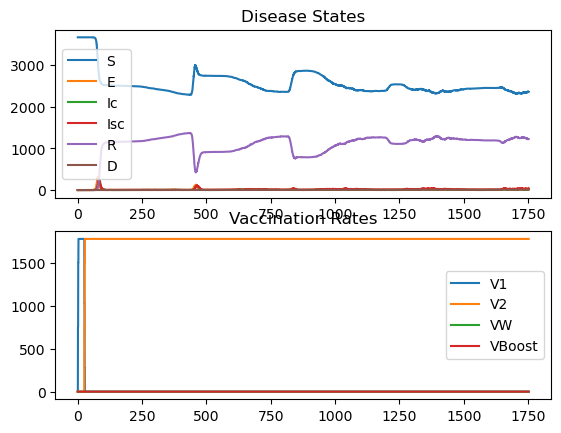

In [2]:
t0 = time.time()
result = BICS_ABM( 
        N_HH = 1000,
        SEED = 4949, 
        RHO = 0.5,
        ALPHA = 0.25,
        BETA0 =0.5,
        BETA1 = 1,
        T0 = 60,
        ISOLATION_MULTIPLIER = 1, #0.5, 
        N_VAX_DAILY = 1500,
        T_REINFECTION = 24*365,
        IMPORT_CASES_VEC = [1 if i%7 == 0 else 0 for i in range(365)],
        vax_rules = [VaccineRule(general=True, hesitancy=.5)],
        VEBoost = 1,
    
#         vax_rules = [
#             VaccineRule("age > 80"),
#             VaccineRule("age > 70"),
#             VaccineRule("age > 60"),
#             VaccineRule("age > 50", hesitancy = 0.5),
#             VaccineRule("age > 40", hesitancy = 0.5),
#             VaccineRule("age > 30", hesitancy = 0.5),
#             VaccineRule(general = True, hesitancy = 0.5),
#         ],
        silent = False,
        BOOSTER_DAY = 90,
        MAX_DAYS = 5*365)

print(time.time() - t0)
result.plot_trajectory()

In [ ]:
# Calculate the effective R0 as beta * average contacts per hour per person * average time infectious

0.01 * np.mean(result.n_edges)/result.S[0] * ((48+96)/2 + (72+168)/2)

In [ ]:
plt.plot(result.n_edges)

In [ ]:
plt.plot(result.n_edges)

# Main analysis

Run simulations that gradually decrease number of nonhousehold contacts required for priority access. Start at 30
and work down. Begin by assuming no asymptomatic transmission and 70% symptomatic rate, no isolation.


Run 10 simulations for each, and chart the number of deaths.

4 vaccine priorities: 
- No vax
- Equal priority vax
- Age priority
- Contact priority

4 transmission scenarios: 
- With all of the above
- With all of the above + prior immunity
- No isolation, no pre/asymptomatic transmission, no NPIs, no prior immunity

# Q1: Comparing strategies

In [ ]:
q1_df = pd.read_csv("q1_df.csv", index_col = 0)

In [ ]:
q1_d = [x.index[x == x.min()].values.tolist() for i, x in q1_df.filter(like="_d").iterrows()]
q1_d = [item for sublist in q1_d for item in sublist]

print(collections.Counter(q1_d))

q1_r = [x.index[x == x.min()].values.tolist() for i, x in q1_df.filter(like="_r").iterrows()]
q1_r = [item for sublist in q1_r for item in sublist]

print(collections.Counter(q1_r))

# Q2: What it index cases come after vaccines have been distributed?

In [ ]:
q2_df = pd.read_csv("q2_df.csv", index_col=0)
# For each sim, figure out which strategy had lowest death and infection rates

q2_d = [x.index[x == x.min()].values.tolist() for i, x in q2_df.filter(like="_d").iterrows()]
q2_d = [item for sublist in q2_d for item in sublist]

print(collections.Counter(q2_d))

q2_r = [x.index[x == x.min()].values.tolist() for i, x in q2_df.filter(like="_r").iterrows()]
q2_r = [item for sublist in q2_r for item in sublist]

print(collections.Counter(q2_r))


# Q3: Finding the top % of num_cc to vaccinate

In [ ]:
q3_df = pd.read_csv("q3_df.csv", index_col = 0)
col = q3_df.pop("general_d")
q3_df.insert(q3_df.shape[1], "0_d", col)
col = q3_df.pop("general_r")
q3_df.insert(q3_df.shape[1], "0_r", col)
q3_df

In [ ]:
q3_d = q3_df.filter(like="_d")
q3_r = q3_df.filter(like="r")
x = [re.split("_",x) for x in q3_d.columns]
x = [int(y[0]) for y in x]
print(x)

In [ ]:
fix, ax = plt.subplots(2, figsize= (10,10))

ax[0].plot(x, q3_d.quantile(.5)*100, color = "red", label="Median")
ax[0].plot(x, q3_d.quantile(.25)*100, color = "black", label = "50% of simulations")
ax[0].plot(x, q3_d.quantile(.75)*100, color = "black")
ax[0].plot(x, q3_d.quantile(.05)*100, color = "grey", label = "90% of simulations")
ax[0].plot(x, q3_d.quantile(.95)*100, color = "grey")
ax[0].set_title("Deaths (% of Population)")
ax[0].set(xlabel="Vaccine Eligibility Threshold Number of Non-Household Contacts", ylabel="%")
ax[0].legend(loc='center left', bbox_to_anchor=(1, -.1))

ax[1].plot(x, q3_r.quantile(.5) *100, color = "red")
ax[1].plot(x, q3_r.quantile(.25)*100, color = "black")
ax[1].plot(x, q3_r.quantile(.75)*100, color = "black")
ax[1].plot(x, q3_r.quantile(.05)*100, color = "grey")
ax[1].plot(x, q3_r.quantile(.95)*100, color = "grey")
ax[1].set_title("Infections (% of Population)")
ax[1].set(xlabel="Vaccine Eligibility Threshold Number of Non-Household Contacts", ylabel="%")

plt.savefig("figs/cc_threshhold.png",bbox_inches='tight')

# Sensitivity tests

beta: 0.0001 to 0.1

rho (probability of clinical): 0 to 1

alpha (relative infectiousness of pre and asymptomatic): 0 to 1

isolation multiplier: 0 to 1

In [ ]:
# beta vec with no asymptomatic transmission
beta_vec = np.arange(0.001, 0.1 , 0.001)
beta_vec = beta_vec.repeat(10)

t = time.time()


def multi_fn(beta):
    """ Wrapper function for multiprocessing
    
    """
    
    result = BICS_ABM(
        ALPHA = 0,
        RHO = 1,
        N_HH = 1000, BETA = beta, 
        silent = True, 
        N_VAX_DAILY = 0
    )
    
    return (result.R[-1] / (result.S[0] + result.E[0]), result.D[-1] / (result.S[0] + result.E[0]))
    
    
result_vec = Parallel(n_jobs=8, verbose = 10)(delayed(multi_fn)(v) for v in beta_vec)
    
    
t = time.time() - t

print(len(beta_vec), "iterations took", t, "seconds")



In [ ]:


fig, ax = plt.subplots(2)
ax[0].scatter(beta_vec, [x[0] for x in result_vec])
ax[1].scatter(beta_vec, [x[1] for x in result_vec])

# Jointly vary the isolation multiplier and the proportion of symptomatic cases

In [ ]:
isomult_vec = np.arange(0, 1, 0.1)
rho_vec = np.arange(0, 1, 0.1)
isomult_vec, rho_vec = np.meshgrid(isomult_vec, rho_vec)
isomult_vec = isomult_vec.flatten().repeat(10)
rho_vec = rho_vec.flatten().repeat(10)


t = time.time()


def multi_fn(i, r):
    """ Wrapper function for multiprocessing
    
    """
    
    result = BICS_ABM(
        RHO = r,
        ISOLATION_MULTIPLIER = i, 
        N_HH = 1000, BETA = 0.01, 
        silent = True, 
        N_VAX_DAILY = 0
    )
    
    return (result.R[-1] / (result.S[0] + result.E[0]), result.D[-1] / (result.S[0] + result.E[0]))
    
    
result_vec = Parallel(n_jobs=8, verbose = 10)(delayed(multi_fn)(*x) for x in zip(isomult_vec, rho_vec))
    
    
t = time.time() - t

print(len(result_vec), "iterations took", t, "seconds")



In [ ]:
dv = np.array([x[0] for x in result_vec]).reshape((10,10,10))
iv = np.array([x[1] for x in result_vec]).reshape((10,10,10))

In [ ]:
plt.imshow(iv, extent = [0,1,0,1])
plt.title("% Of population infected")
plt.xlabel("Isolation Multiplier")
plt.ylabel("Proportion of cases that are clinical")
plt.show()

In [ ]:
plt.imshow(dv, extent = [0,1,0,1])
plt.title("% Of population dead")
plt.xlabel("Isolation Multiplier")
plt.ylabel("Proportion of cases that are clinical")
plt.show()

# Speed test

Not whole necessary, but kind of fun. Seems like there is no benefit past 4 or 8 threads.


In [ ]:
if True:
    reps = np.arange(1, 128, 1)



    def multi_fn(i):
        """ Wrapper function for multiprocessing

        """

        result = BICS_ABM(
            N_HH = 1000, 
            silent = True, 
        )

        return 0


    tlist = list()
    jlist = [4, 8, 16, 32, 64, 128]
    for jobs in jlist:
        t = time.time()
        Parallel(n_jobs=jobs, verbose = 10, prefer="threads")(delayed(multi_fn)(v) for v in reps)
        t = time.time() - t
        tlist.append(t)

    plt.scatter(jlist, tlist)